# Disaster Tweet Classification Project

## Kaggle Competition: Disaster Tweets

### Project Overview
Welcome to the "Getting Started" competition on Kaggle, focused on Natural Language Processing (NLP). This challenge is ideal for data scientists looking to explore NLP with a manageable dataset size. The competition involves building a machine learning model to classify tweets as related to real disasters or not.

### Competition Description
Twitter serves as a crucial communication platform during emergencies. With the widespread use of smartphones, individuals can report emergencies in real-time. However, distinguishing between tweets that genuinely announce disasters and those that do not can be challenging for machines. This competition aims to address this issue by predicting which tweets are about real disasters using a dataset of 10,000 hand-classified tweets.

### Deliverables
1. **Jupyter Notebook**: Includes problem description, exploratory data analysis, model building, and results.
2. **GitHub Repository**: Contains all project files and code.
3. **Kaggle Leaderboard Screenshot**: Shows the position of the top-performing model.

### Dataset
- **Source**: Kaggle
- **Size**: 10,000 tweets
- **Features**: Tweets with binary classification (disaster or not)

### Objectives
- Perform exploratory data analysis to understand the dataset.
- Build and train a text classification model to predict disaster-related tweets.
- Evaluate the model's performance and discuss results.

### Additional Resources
- Join the Kaggle Discord for discussions: [Kaggle Discord](https://discord.gg/kaggle)

### Author
- **Name**: Tim Cerelli
- **Date**: February 26, 2025

---


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Import necessary libraries
import numpy as np  # For linear algebra
import pandas as pd  # For data processing, CSV file I/O (e.g. pd.read_csv)
import os  # For operating system dependent functionality
import seaborn as sns
import matplotlib.pyplot as plt

# Additional libraries for visualization and machine learning
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# List all files under the input directory to understand the available data
print("Files in the input directory:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Import Data 

In [22]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
submission_data = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

# Display the first few rows of the training data
print("Training Data Preview:")
print(train_data.head())

# Display basic information about the training data
print("\nTraining Data Info:")
print(train_data.info())

# Display basic statistics of the training data
print("\nTraining Data Description:")
print(train_data.describe())

# Check for missing values in the training data
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

# Similarly, you can explore the test and submission datasets
# print("Test Data Preview:")
# print(test_data.head())
# print("\nTest Data Info:")
# print(test_data.info())
# print("\nMissing Values in Test Data:")
# print(test_data.isnull().sum())

Training Data Preview:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ 

# Text Preprocessing with NLTK

Text preprocessing is a crucial step in preparing textual data for analysis or machine learning models. The Natural Language Toolkit (NLTK) is a powerful library in Python that provides easy-to-use interfaces for various text processing tasks. Below are the key steps involved in text preprocessing using NLTK:

## 1. Tokenization
Tokenization is the process of splitting text into individual words or tokens. This helps in analyzing the text at the word level.

## 2. Lowercasing
Converting all text to lowercase ensures uniformity and helps in reducing the complexity of the text data by treating words like "The" and "the" as the same.

## 3. Removing Punctuation
Punctuation marks are generally not useful for text analysis and can be removed to simplify the text.

## 4. Stopword Removal
Stopwords are common words (e.g., "and", "the") that may not add significant meaning to the text. Removing them can help in focusing on more meaningful words.

## 5. Stemming or Lemmatization
- **Stemming:** Reduces words to their root form (e.g., "running" becomes "run").
- **Lemmatization:** Similar to stemming but more linguistically accurate, reducing words to their base form.

In [23]:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import re
import string
# Remove URL from the text
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# Remove puctuations
def remove_punct(text):
    translator = str.maketrans('', '', string.punctuation) # Create a translation table to delete all punctuation
    return text.translate(translator) # Use this translation tabl

train_data['text'] = train_data['text'].apply(lambda x: remove_URL(x))
train_data['text'] = train_data['text'].apply(lambda x: remove_punct(x))

test_data['text'] = test_data['text'].apply(lambda x: remove_URL(x))
test_data['text'] = test_data['text'].apply(lambda x: remove_punct(x))


In [25]:
def clean(data):
    corpus = []
    for i in range(len(data)):
        review = re.sub('[^a-zA-Z0-9]',' ',data[i])
        review = review.lower()
        review = review.split()
        review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [26]:
train_data['text'] = clean(train_data['text'])  
test_data['text'] = clean(test_data['text'])  

X_train = train_data.iloc[:5000, 1:2].values  
Y_train = train_data.iloc[5000:, 1:2].values  

print(X_train)  
print(Y_train)  


[[nan]
 [nan]
 [nan]
 ...
 ['military']
 ['military']
 ['military']]
[['military']
 ['military']
 ['military']
 ...
 [nan]
 [nan]
 [nan]]


# Text to Vector Conversion Using CountVectorizer

`CountVectorizer` is a tool provided by the `scikit-learn` library in Python, which is used to convert a collection of text documents to a matrix of token counts. This is a crucial step in text processing for machine learning models.



In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)  # Limit to top 1000 features

# Use the correct dataset names
X_cv = cv.fit_transform(train_data['text']).toarray()  
test_cv = cv.transform(test_data['text']).toarray()  

y = train_data['target']  # Define target variable correctly


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv,y,test_size=0.2,random_state=42)

In [29]:
# Import necessary models and evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.metrics import classification_report, accuracy_score, f1_score  # Metrics to evaluate model performance
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier

# Initialize all the models you want to train and evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Logistic Regression with max iterations set to 1000
    'Decision Tree': DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10),  # Decision Tree with constraints on depth and leaf nodes
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),  # Random Forest with 100 trees and fixed random seed
    'Support Vector Machine': SVC(probability=True, kernel='linear'),  # SVM with linear kernel and probability estimates enabled
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # Gradient Boosting with learning rate and depth restrictions
}

# Initialize lists to store accuracy scores and model names for comparison
acc = []  # List to store accuracy scores
mod = []  # List to store model names

# Loop through each model in the dictionary, train it, and evaluate on the test set
for model_name, model in models.items():
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score and model name to the respective lists
    acc.append(accuracy)
    mod.append(model_name)
    
    # Print the name of the model and its accuracy score
    print(f"Model: {model_name}\nAccuracy Score: {accuracy}")
    
    # Display detailed classification report (precision, recall, f1-score) for the model
    print(classification_report(y_test, y_pred))

# After evaluating all models, print out the comparison of their accuracy scores
print("\nModel Comparison (Accuracy Scores):")
results = pd.DataFrame({'Model': mod, 'Accuracy': acc})  # Create a DataFrame for better readability
print(results.sort_values(by='Accuracy', ascending=False))  # Sort models by accuracy in descending order


Model: Logistic Regression
Accuracy Score: 0.7879185817465528
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Model: Decision Tree
Accuracy Score: 0.6618516086671044
              precision    recall  f1-score   support

           0       0.64      0.96      0.76       874
           1       0.82      0.27      0.40       649

    accuracy                           0.66      1523
   macro avg       0.73      0.61      0.58      1523
weighted avg       0.71      0.66      0.61      1523

Model: Random Forest
Accuracy Score: 0.7649376231122784
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       874
           1       0.73      0.71      0.72       649

    accu

In [30]:
df1 = pd.DataFrame([a for a in acc],index=[m for m in mod],columns=['Accuracy'])
df1

,Accuracy
Logistic Regression,0.787919
Decision Tree,0.661852
Random Forest,0.764938
Support Vector Machine,0.783322
Gradient Boosting,0.754432


## Accuracy Score Visualisation

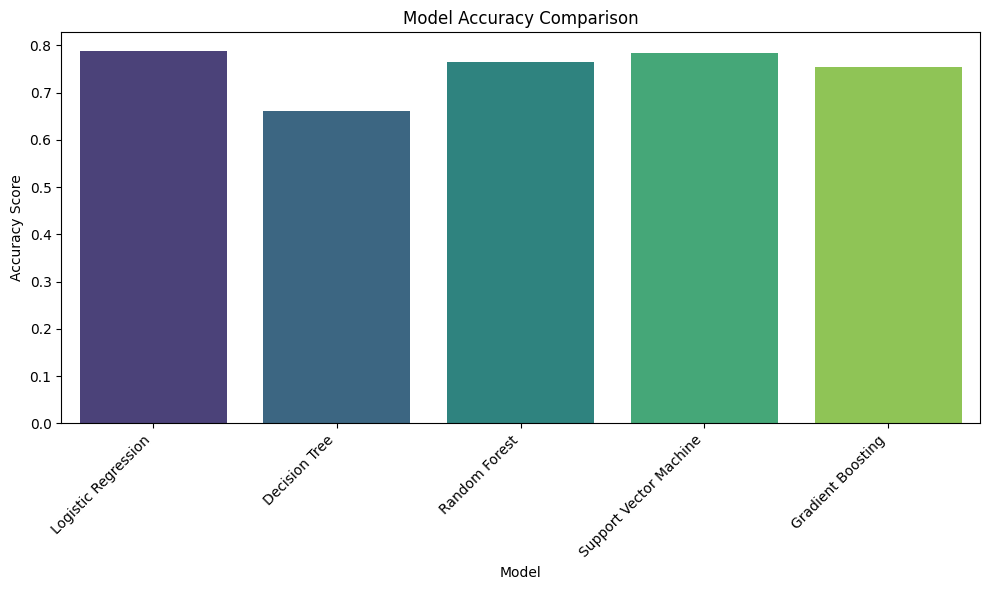

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pandas Series as explained before
df = pd.Series([a for a in acc], index=[m for m in mod])

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=df.index, y=df.values, palette='viridis')  # Create a bar plot
plt.title('Model Accuracy Comparison')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Accuracy Score')  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to fit nicely
plt.show()


In [39]:
# Load the test data if not already loaded
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Transform the test data using CountVectorizer
test_dataset = cv.transform(test_data['text']).toarray()

# Predict using the trained Logistic Regression model
test_pred = logistic.predict(test_dataset)

# Optionally, print or process the predictions
print(test_pred)
# Initialize and train the Logistic Regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic Regression\nAccuracy Score: {accuracy}")
print(classification_report(y_test, y_pred))


[1 0 1 ... 0 0 0]
Model: Logistic Regression
Accuracy Score: 0.7879185817465528
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [ ]:
test.drop(columns='text')

In [43]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({
    'id': test_data['id'],  # Use 'id' from the test data
    'target': test_pred     # Use the predictions from the Logistic Regression model
})


# Save the DataFrame to a CSV file
predictions_df.to_csv('submission.csv', index=False)
